<a href="https://colab.research.google.com/github/wagnerdeandrade/mo432/blob/main/exercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema descrito em: https://www.ic.unicamp.br/~wainer/cursos/1s2021/432/exercicio1.html <br>
<small>*Sempre que necessário farei referência aos nomes dos atributos conforme descritos em: https://archive.ics.uci.edu/ml/datasets/Solar+Flare*<small>

#1) Leia
Lendo o arquivo e imprimindo as primeras e últimas linhas de seu conteúdo.

In [36]:
import pandas as pd
import requests

In [161]:
url = "https://www.ic.unicamp.br/~wainer/cursos/1s2021/432/solar-flare.csv"

solar_flare_df = pd.read_csv(url,sep=' ',skiprows=1,header=None,)

solar_flare_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,H,S,X,1,2,1,1,1,1,1,0,0,0
1062,H,S,X,2,2,1,1,2,1,1,0,0,0
1063,C,S,O,1,2,1,2,2,1,1,0,0,0
1064,H,R,X,1,2,1,1,2,1,1,0,0,0


In [166]:
# debug


#restolho = solar_flare_df[solar_flare_df[10] > 0]
#restolho

column = solar_flare_df[10]
max_value = column.max()
print(max_value)

8


#2) Converta os atributos categóricos para numéricos
- Convertendo todos os atributos categóricos (colunas 0,1 e 2 do dataframe original) para numéricos usando one-hot-enconder;
- Concatenando as dummy variables ao conjunto principal de dados enquanto jogamos fora os dados categóricos que eles representam;
- Resetando o header do dataframe pois este conjunto de dados não tem descrição na primeira coluna;
- e, imprimindo o inicio e o fim desse conjunto de dados final.

In [69]:
class_dummies = pd.get_dummies(solar_flare_df[0])
large_spot_sz_dummies = pd.get_dummies(solar_flare_df[1])
spot_distr_dummies = pd.get_dummies(solar_flare_df[2])

In [70]:
numeric_solar_flare_df = pd.concat([class_dummies, 
                                    large_spot_sz_dummies, 
                                    spot_distr_dummies, 
                                    solar_flare_df.drop(columns=[0, 1,2])
                                    ], axis=1)

In [77]:
numeric_solar_flare_df.columns = [x for x in range(0, len(numeric_solar_flare_df.columns))]

In [78]:
numeric_solar_flare_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,3,1,1,1,1,1,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,3,1,1,2,1,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,3,1,1,2,1,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,2,1,1,1,1,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,2,1,1,1,1,1,0,0,0
1062,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2,2,1,1,2,1,1,0,0,0
1063,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,1,2,2,1,1,0,0,0
1064,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,2,1,1,2,1,1,0,0,0


#3) Centering and scaling
Faca o centering and standard scaling para todos os atributos de entrada (convertidos para numéricos)

In [41]:
from sklearn import preprocessing

In [89]:
cs_numeric_solar_flare_nparray = preprocessing.scale(numeric_solar_flare_df)

#4) PCA

## 4.1) Separando predictors de target
Apenas os predictors são usados para fazer a análise de redução de dimensionalidade por PCA

In [118]:
cs_numeric_solar_flare_predictors_nparray = cs_numeric_solar_flare_nparray[:, :-3]
cs_numeric_solar_flare_targets_nparray = cs_numeric_solar_flare_nparray[:, -3:]

## 4.2)
- Reduzindo a dimensionalidade dos atributos usando PCA vemos que enquanto mantemos 90% da variância dos dados temos 13 dimensões restantes

In [119]:
from sklearn.decomposition import PCA

pca = PCA(.9)
X_pca_numeric_solar_flare_predictors_nparray = pca.fit_transform(cs_numeric_solar_flare_predictors_nparray)

pca.n_components_

13

- Com o Scree Plot é possível perceber que usando apenas 5 componentes a variância se mantém bastante significativa e que a diferença entre usar 11, 12 ou 13 componentes seria de fato muito baixa e portanto, usar 11 componentes poderia trazer um melhor resultado em termos de tempo de execução computacional para o modelo de regressão. 

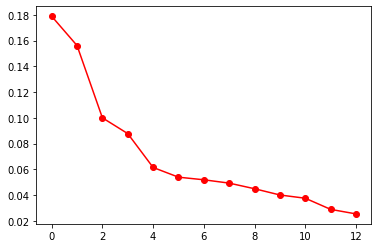

In [120]:
import numpy as np
from matplotlib import pyplot as plt

pca_scree_plot_values = np.arange(pca.n_components_)
plt.plot(pca_scree_plot_values, pca.explained_variance_ratio_, 'ro-')
plt.show()

#5) Validação cruzada e regressão linear
Fazendo 5 repetições de uma validação cruzada aleatória com split de 70/30 (70% treino 30% teste).

Treine 3 regressões lineares, uma para cada um dos 3 atributos de saída.

regressão linear do Sklearn https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Treine no conjunto de treino e meça o RMSE e o MAE deste modelo treinado no conjunto de teste correspondente.

Imprima o RMSE e o MAE no conjunto de testes de cada uma das 5 repetições. Imprima também a média do RMSE e do MAE.

In [170]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

target_data_meaning = {0: "C class", 1: "M-class", 2: "X-class"}
repetitions_n = 5 

for t_class in range(0, np.shape(cs_numeric_solar_flare_targets_nparray)[1]):
  print("\nTarget " + str(target_data_meaning[t_class]))
  rmse_sum = 0
  mae_sum = 0

  for i in range(0, repetitions_n):

    # Split the data on 70/30 proportion - 70 % for train, 30 to test
    X_train, X_test, y_train, y_test = train_test_split(
                                                        X_pca_numeric_solar_flare_predictors_nparray,
                                                        cs_numeric_solar_flare_targets_nparray[:,0],
                                                        train_size=0.7
                                                      )

    # Train the linear regression with the selected trainning data
    trained_regression_model = LinearRegression().fit(X_train, y_train)

    # Test the resulting model
    y_predicted = trained_regression_model.predict(X_test)

    # Calculate the MAE and RMSE values 
    print("Repetition " + str(i) + ":")
    rmse = mean_squared_error(y_test, y_predicted, squared=False)
    mae = mean_absolute_error(y_test, y_predicted)
    print("    RMSE = " + str(rmse))
    print("    MAE  = " + str(mae))
    rmse_sum += rmse 
    mae_sum += mae

  print("\nMean RMSE = " + str(rmse_sum/repetitions_n))
  print("Mean MAE  = " + str(mae_sum/repetitions_n))
  print("-----------------------------------------------")
  


Target C class
Repetition 0:
    RMSE = 0.8206004092372198
    MAE  = 0.48528580670239174
Repetition 1:
    RMSE = 0.8870287059599371
    MAE  = 0.4820738176761747
Repetition 2:
    RMSE = 0.869042132016754
    MAE  = 0.4964573914326481
Repetition 3:
    RMSE = 0.9711426839795428
    MAE  = 0.5452237914866036
Repetition 4:
    RMSE = 0.965263120278425
    MAE  = 0.5245591235941152

Mean RMSE = 0.9026154102943756
Mean MAE  = 0.5067199861783868
-----------------------------------------------

Target M-class
Repetition 0:
    RMSE = 1.0176690040644898
    MAE  = 0.5402340388603764
Repetition 1:
    RMSE = 0.8277263734348751
    MAE  = 0.44461998376248274
Repetition 2:
    RMSE = 0.8953585079969216
    MAE  = 0.4849353624053476
Repetition 3:
    RMSE = 1.0146065336949919
    MAE  = 0.5313890574205666
Repetition 4:
    RMSE = 0.8997810658260019
    MAE  = 0.5135486217359427

Mean RMSE = 0.931028297003456
Mean MAE  = 0.5029454128369432
-----------------------------------------------

Target